In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

In [2]:
df = pl.read_csv("../data/selected_features_inflation.csv", infer_schema_length=10000, dtypes={"ANDENOx": pl.Float64})

display(df.head())

print("\nDataframe info:")
print(f"Shape: {df.shape}")
print(f"Column names: {df.columns}")
print(f"Data types:\n{df.dtypes}")

/var/folders/jb/ckb_b9f94m5dvhsy6d9bwn800000gn/T/ipykernel_64499/3781630620.py:1: DeprecationWarning: The argument `dtypes` for `read_csv` is deprecated. It has been renamed to `schema_overrides`.
  df = pl.read_csv("../data/selected_features_inflation.csv", infer_schema_length=10000, dtypes={"ANDENOx": pl.Float64})


sasdate,CPIAUCSL_YOY,CUSR0000SA0L5_YOY,ACOGNO_YOY,TOTRESNS_YOY,CUSR0000SAD_YOY,AMDMUOx_YOY,S&P PE ratio_MOM,HWIURATIO,OILPRICEx_YOY,USCONS_YOY,CPIMEDSL_YOY,WPSFD49207_YOY,TOTRESNS_MOM,IPNMAT_YOY,S&P 500_MOM,CES1021000001,UEMP27OV_YOY,WPSID61_YOY,USTRADE,CES3000000008_YOY,RPI_YOY,CUSR0000SAS_YOY,GS10,S&P PE ratio_YOY,IPB51222S,EXUSUKx,DTCTHFNM_YOY,WPSID61_MOM,COMPAPFFx,ANDENOx,CES0600000007,CLAIMSx,IPDCONGD_YOY,IPDCONGD,OILPRICEx_MOM,HOUSTNE,…,DSERRG3M086SBEA_YOY,EXJPUSx_YOY,ACOGNO_MOM,EXJPUSx_MOM,UEMP5TO14_MOM,EXSZUSx_MOM,BUSLOANS_YOY,CES1021000001_MOM,CLF16OV_MOM,DTCTHFNM_MOM,EXCAUSx_MOM,UEMPLT5_MOM,CMRMTSPLx_MOM,CLF16OV_YOY,CPIMEDSL_MOM,PERMITNE,TB6SMFFM,WPSID62_MOM,AMDMNOx_YOY,M1SL_MOM,IPBUSEQ_MOM,EXUSUKx_MOM,CES2000000008_MOM,PPICMM_YOY,IPCONGD_MOM,PPICMM_MOM,UEMP15T26_YOY,IPNCONGD_YOY,USGOVT_MOM,HOUSTW,NDMANEMP_MOM,IPDCONGD_MOM,AMDMNOx_MOM,IPNMAT_MOM,DDURRG3M086SBEA_MOM,DDURRG3M086SBEA_YOY,CPIAPPSL_MOM
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,i64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64
"""1959-01-01""",null,null,null,null,null,null,null,0.333579,null,null,null,null,null,null,null,713.0,null,null,5350.3,null,null,null,4.02,null,19.9173,2.8065,null,null,0.82,null,39.8,291078,null,18.9498,null,350,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0.61,null,null,null,null,null,null,null,null,null,null,null,null,350,null,null,null,null,null,null,null
"""1959-02-01""",null,null,null,null,null,null,-0.149749,0.358386,null,null,null,null,-1.587302,null,-1.528227,704.2,null,null,5381.3,null,null,null,3.96,null,19.8631,2.8093,null,0.326797,0.83,null,39.7,282958,null,19.0492,0.0,346,…,null,null,null,0.0,-0.427716,0.025509,null,-1.234222,-0.422456,0.0,0.796195,-1.270648,0.736297,null,0.473934,null,0.7,-0.632911,null,0.359971,1.338499,0.099768,0.408163,null,0.733585,0.0,null,null,0.135719,344,0.287632,0.524544,4.646258,1.751079,0.058252,null,-0.223214
"""1959-03-01""",null,null,null,null,null,null,3.155764,0.400947,null,null,null,null,-1.075269,null,2.537886,704.1,null,null,5431.6,null,null,null,3.99,null,19.9986,2.8127,null,0.0,0.55,null,40.0,260346,null,19.4223,-1.0,330,…,null,null,null,0.0,-6.099656,0.220249,null,-0.014201,0.619374,0.414702,-0.512926,-6.113256,-0.336805,null,0.471698,null,0.33,0.318471,null,0.215208,1.08067,0.121027,-0.406504,null,0.0,1.230769,null,null,0.197141,374,0.286807,1.958612,2.241358,1.502019,0.125877,null,0.0
"""1959-04-01""",null,null,null,null,null,null,1.440165,0.444973,null,null,null,null,1.630435,null,1.673789,705.2,null,null,5395.4,null,null,null,4.12,null,20.0799,2.8165,null,0.0,0.46,null,40.2,246413,null,19.5466,0.0,275,…,null,null,null,0.0,-14.547118,-0.004627,null,0.156228,0.398131,1.093206,-0.639307,2.398903,2.011502,null,0.0,null,0.31,0.634921,null,0.0,2.613397,0.135102,0.816327,null,1.577494,-0.607903,null,null,0.122971,388,0.222434,0.639986,1.105071,3.09727,0.100575,null,0.223714
"""1959-05-01""",null,null,null,null,null,null,1.147522,0.475711,null,null,null,null,-0.534759,null,1.50613,710.0,null,null,5456.3,null,null,null,4.31,null,20.3779,2.8145,null,0.651466,0.66,null,40.3,246952,null,19.9445,0.0,260,…,null,null,null,0.0,7.601713,0.004627,null,0.680658,-0.23559,1.297661,-0.062267,-1.004016,0.686227,null,0.469484,null,0.43,-0.630915,null,0.71582,3.240249,-0.07101,0.404858,null,0.47775,0.611621,null,null,0.135102,396,0.301205,2.035648,-4.212454,0.898387,0.16641,null,0.223214



Dataframe info:
Shape: (793, 103)
Column names: ['sasdate', 'CPIAUCSL_YOY', 'CUSR0000SA0L5_YOY', 'ACOGNO_YOY', 'TOTRESNS_YOY', 'CUSR0000SAD_YOY', 'AMDMUOx_YOY', 'S&P PE ratio_MOM', 'HWIURATIO', 'OILPRICEx_YOY', 'USCONS_YOY', 'CPIMEDSL_YOY', 'WPSFD49207_YOY', 'TOTRESNS_MOM', 'IPNMAT_YOY', 'S&P 500_MOM', 'CES1021000001', 'UEMP27OV_YOY', 'WPSID61_YOY', 'USTRADE', 'CES3000000008_YOY', 'RPI_YOY', 'CUSR0000SAS_YOY', 'GS10', 'S&P PE ratio_YOY', 'IPB51222S', 'EXUSUKx', 'DTCTHFNM_YOY', 'WPSID61_MOM', 'COMPAPFFx', 'ANDENOx', 'CES0600000007', 'CLAIMSx', 'IPDCONGD_YOY', 'IPDCONGD', 'OILPRICEx_MOM', 'HOUSTNE', 'REALLN_MOM', 'BOGMBASE_MOM', 'DTCOLNVHFNM_YOY', 'NDMANEMP_YOY', 'TWEXAFEGSMTHx_YOY', 'ANDENOx_MOM', 'CPIAPPSL_YOY', 'DSERRG3M086SBEA_MOM', 'IPFUELS_MOM', 'RETAILx_MOM', 'W875RX1_MOM', 'CUSR0000SAS_MOM', 'CUSR0000SA0L5_MOM', 'CUSR0000SAD', 'BUSINVx_MOM', 'UEMPLT5_YOY', 'INVEST_MOM', 'EXSZUSx', 'IPMAT_YOY', 'UMCSENTx', 'BOGMBASE_YOY', 'UEMP15OV_MOM', 'RETAILx_YOY', 'USGOVT_YOY', 'CES300000000

In [3]:
df_with_lag = df.with_columns([
    pl.col(col).shift(1).alias(f"{col}_lag1") 
    for col in df.columns 
    if col != "sasdate"
])

## Single VAR OLS

In [4]:
import statsmodels as sm
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime

target = 'CPIAUCSL_YOY'
predictor = 'CPIAUCSL_YOY_lag1'

# Filter data to include only post-2008 observations
post_2008_df = df_with_lag.filter(
    pl.col("sasdate").str.strptime(pl.Date, "%Y-%m-%d") >= datetime.date(2008, 1, 1)
)



train_df = post_2008_df.select(["sasdate", target, predictor])


train_df = train_df.drop_nulls()

formula = f"{target} ~ {predictor}"
model = ols(formula, data=train_df.to_pandas()).fit()

print(f"\nOLS Regression Results for {target} ~ {predictor} (lagged by 1) - Post 2008 Data")
print(model.summary())


OLS Regression Results for CPIAUCSL_YOY ~ CPIAUCSL_YOY_lag1 (lagged by 1) - Post 2008 Data
                            OLS Regression Results                            
Dep. Variable:           CPIAUCSL_YOY   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     3862.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):          4.50e-134
Time:                        14:42:17   Log-Likelihood:                -130.44
No. Observations:                 205   AIC:                             264.9
Df Residuals:                     203   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [5]:
from sklearn.metrics import mean_squared_error
import datetime

filtered_df = df_with_lag.with_columns(
    pl.col("sasdate").str.strptime(pl.Date, "%Y-%m-%d").alias("date")
).filter(
    (pl.col("date") >= datetime.date(1970, 1, 1)) & 
    (pl.col("date") <= datetime.date(2005, 12, 31))
)
filtered_df.head(5)

sasdate,CPIAUCSL_YOY,CUSR0000SA0L5_YOY,ACOGNO_YOY,TOTRESNS_YOY,CUSR0000SAD_YOY,AMDMUOx_YOY,S&P PE ratio_MOM,HWIURATIO,OILPRICEx_YOY,USCONS_YOY,CPIMEDSL_YOY,WPSFD49207_YOY,TOTRESNS_MOM,IPNMAT_YOY,S&P 500_MOM,CES1021000001,UEMP27OV_YOY,WPSID61_YOY,USTRADE,CES3000000008_YOY,RPI_YOY,CUSR0000SAS_YOY,GS10,S&P PE ratio_YOY,IPB51222S,EXUSUKx,DTCTHFNM_YOY,WPSID61_MOM,COMPAPFFx,ANDENOx,CES0600000007,CLAIMSx,IPDCONGD_YOY,IPDCONGD,OILPRICEx_MOM,HOUSTNE,…,EXJPUSx_YOY_lag1,ACOGNO_MOM_lag1,EXJPUSx_MOM_lag1,UEMP5TO14_MOM_lag1,EXSZUSx_MOM_lag1,BUSLOANS_YOY_lag1,CES1021000001_MOM_lag1,CLF16OV_MOM_lag1,DTCTHFNM_MOM_lag1,EXCAUSx_MOM_lag1,UEMPLT5_MOM_lag1,CMRMTSPLx_MOM_lag1,CLF16OV_YOY_lag1,CPIMEDSL_MOM_lag1,PERMITNE_lag1,TB6SMFFM_lag1,WPSID62_MOM_lag1,AMDMNOx_YOY_lag1,M1SL_MOM_lag1,IPBUSEQ_MOM_lag1,EXUSUKx_MOM_lag1,CES2000000008_MOM_lag1,PPICMM_YOY_lag1,IPCONGD_MOM_lag1,PPICMM_MOM_lag1,UEMP15T26_YOY_lag1,IPNCONGD_YOY_lag1,USGOVT_MOM_lag1,HOUSTW_lag1,NDMANEMP_MOM_lag1,IPDCONGD_MOM_lag1,AMDMNOx_MOM_lag1,IPNMAT_MOM_lag1,DDURRG3M086SBEA_MOM_lag1,DDURRG3M086SBEA_YOY_lag1,CPIAPPSL_MOM_lag1,date
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,i64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,date
"""1970-01-01""",6.162465,6.111111,null,2.846975,4.622871,4.446628,-0.677168,1.076226,9.120521,2.29202,6.148867,5.107527,2.846975,3.89707,-0.878059,608.0,10.0,4.166667,7427.2,5.685619,4.069592,7.643312,7.79,-16.000311,45.1487,2.4004,6.392325,0.864553,-0.2,8224.328464,40.0,247000,-9.313255,33.9416,0.0,146,…,-0.046492,null,-0.007155,-0.563063,-0.365267,10.801141,0.098023,0.27888,0.982774,-0.157993,0.316456,-0.184373,2.719505,0.307692,184,-1.07,-0.284091,1.60164,0.147348,-0.371198,0.041731,1.348315,20.240964,0.134427,2.464066,47.120419,3.452803,0.232969,322,-0.027793,-0.58723,-1.109157,0.500797,-0.017281,2.510077,0.172712,1970-01-01
"""1970-02-01""",6.424581,6.371191,null,2.197802,3.846154,2.684088,-3.450821,0.987257,9.120521,3.58042,5.769231,4.83871,-3.460208,3.266653,-3.487986,606.6,40.0,3.857567,7443.3,5.666667,3.839929,7.936508,7.24,-17.829282,44.8829,2.4047,5.967102,0.0,-0.43,7720.869502,40.0,258500,-7.928228,34.4365,0.0,235,…,-0.050086,null,0.01789,5.662514,0.116015,9.418403,-0.767096,0.437371,-0.840336,-0.121009,13.564669,-1.260381,3.09093,0.613497,150,-1.2,0.0,-4.779175,1.128004,-1.393979,0.129312,0.665188,20.979021,-1.677022,4.008016,37.799043,2.364661,0.15228,223,0.166806,-5.249288,-3.93585,-0.753935,-0.025927,2.303747,0.344828,1970-02-01
"""1970-03-01""",6.094183,6.043956,null,2.61194,2.850356,1.155227,1.850075,0.887208,3.076923,3.29701,5.732484,4.545455,-1.433692,1.602027,1.7095,605.7,52.10084,2.949853,7467.0,5.980066,3.775253,8.176101,7.07,-13.558105,44.9749,2.4058,5.23276,-0.285714,0.57,6952.861502,39.9,268250,-7.574344,34.7636,0.0,250,…,-0.017885,null,-0.007155,12.325831,-0.347641,7.527242,-0.230263,0.207365,-0.376648,0.018639,8.333333,0.088882,2.664367,0.609756,192,-1.76,0.2849,-7.884488,-0.581959,0.424229,0.179137,0.440529,18.894009,0.9872,-0.578035,27.160494,1.957742,0.176056,308,-0.20816,1.458093,-0.647848,0.321445,0.146955,2.058465,0.515464,1970-03-01
"""1970-04-01""",6.060606,6.010929,null,3.690037,3.080569,-2.218317,-3.089668,0.825388,0.0,2.200557,6.012658,3.989362,2.181818,1.479129,-3.045685,602.9,51.879699,3.846154,7448.9,5.280528,4.555988,8.125,7.39,-17.315888,45.4861,2.4061,4.594977,0.573066,-0.04,6556.620652,39.7,325250,-5.119271,34.7476,0.0,211,…,-0.100147,null,-0.046509,8.110687,0.23722,6.221892,-0.148368,0.422393,-0.647084,-0.037272,1.435897,-1.168533,3.020767,0.606061,177,-1.18,1.136364,-8.713137,0.341463,0.201982,0.045744,0.877193,21.428571,-0.119921,2.131783,50.854701,0.64973,0.679022,270,-0.278125,0.949864,-2.40407,-1.14774,0.159687,1.72706,0.0,1970-04-01
"""1970-05-01""",6.043956,5.99455,null,0.0,4.285714,-4.018436,-11.011346,0.750191,0.

In [6]:
print(f"Model formula: {formula}") 

y_true_filtered = filtered_df[target]
y_pred_filtered = model.predict(filtered_df.to_pandas())

# We can also explicitly check which columns the model is using
print(f"Model exog names: {model.model.exog_names}")

mse_filtered = mean_squared_error(y_true_filtered, y_pred_filtered)
rmse_filtered = np.sqrt(mse_filtered)
r2_filtered = model.rsquared

print(f"\nResults for dates between 1970-2005:")
print(f"Mean Squared Error (MSE): {mse_filtered:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_filtered:.6f}")
print(f"R-squared: {r2_filtered:.6f}")


Model formula: CPIAUCSL_YOY ~ CPIAUCSL_YOY_lag1
Model exog names: ['Intercept', 'CPIAUCSL_YOY_lag1']

Results for dates between 1970-2005:
Mean Squared Error (MSE): 0.136219
Root Mean Squared Error (RMSE): 0.369078
R-squared: 0.950058


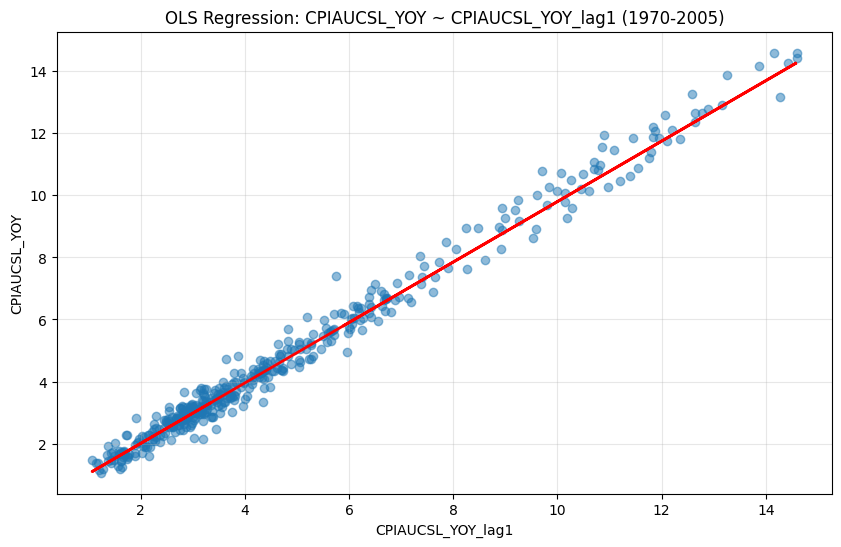

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df[predictor], filtered_df[target], alpha=0.5)
plt.plot(filtered_df[predictor], y_pred_filtered, color='red', linewidth=2)
plt.xlabel(predictor)
plt.ylabel(target)
plt.title(f'OLS Regression: {target} ~ {predictor} (1970-2005)')
plt.grid(True, alpha=0.3)
plt.show()

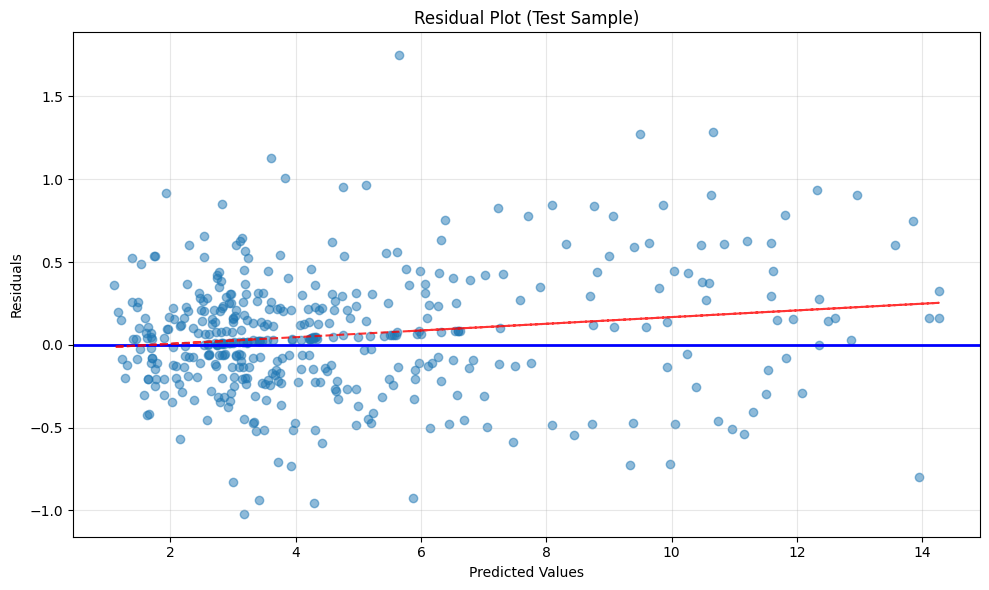

In [8]:
residuals = y_true_filtered - pl.Series(y_pred_filtered.values)

plt.figure(figsize=(10, 6))

plt.scatter(y_pred_filtered, residuals, alpha=0.5)
plt.axhline(y=0, color='b', linestyle='-', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Sample)")
plt.grid(True, alpha=0.3)

z = np.polyfit(y_pred_filtered, residuals, 1)
p = np.poly1d(z)
plt.plot(y_pred_filtered, p(y_pred_filtered), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

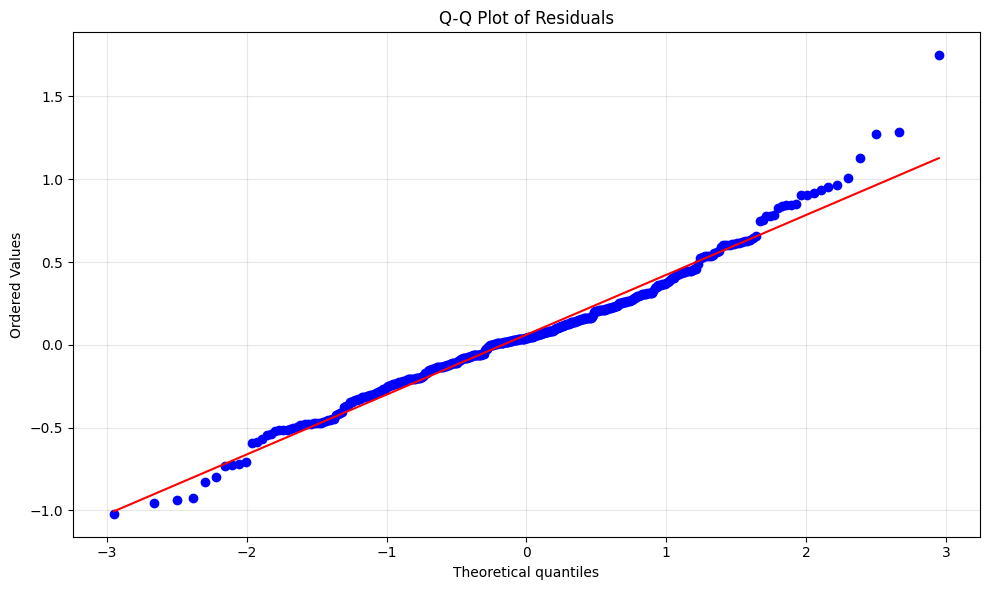

In [9]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Ridge Regression

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

target = "CPIAUCSL_YOY"
lag_cols = [col for col in post_2008_df.columns if col.endswith("_lag1") and col != f"{target}_lag1"]

post_2008_df_pd = post_2008_df.to_pandas().dropna(subset=lag_cols + [target])



X = post_2008_df_pd[lag_cols]
X_scaled = scaler.fit_transform(X)
X_scaled_sm = sm.add_constant(X_scaled)

y = post_2008_df_pd[target]


In [31]:
alpha = 1.0
ridge_model = sm.OLS(y, X_scaled_sm).fit_regularized(alpha=alpha, L1_wt=0.0)  # L1_wt=0.0 means pure ridge (L2)
print(ridge_model.params)

[ 1.24768593e+00  1.88043800e-01  1.30350084e-01 -6.22463774e-02
  1.01972398e-01  4.99800942e-02  8.48354035e-03  9.08420876e-02
  1.11542133e-01 -1.49176263e-02  8.80896388e-02  1.80264518e-01
 -1.28573836e-02 -1.61282370e-02 -1.06997910e-02 -5.91943671e-02
 -4.50649868e-02  1.34391699e-01 -3.89350110e-03  7.23061291e-02
 -2.44980539e-02  1.09741528e-01  3.16723997e-02  2.45825544e-02
  2.63491789e-02  4.24775857e-03  7.52728269e-02  2.86395169e-02
  6.78535211e-02  1.11269894e-02 -3.90177459e-02 -9.76805772e-03
 -4.19456212e-02  2.94901939e-02  9.60353129e-03  2.64551410e-02
  3.89952594e-02  3.47932654e-03  1.56536989e-04  2.36144968e-02
 -7.37055245e-02 -1.96429726e-02  9.76299111e-02  7.58125738e-02
 -3.00978252e-02  2.45325064e-02  2.06793835e-03  8.53788853e-02
  5.81053548e-02  9.26149480e-02  5.78195223e-02  1.06151550e-02
 -5.86833532e-02 -1.24608196e-02  8.79051617e-03 -1.05308894e-01
 -4.19324381e-02  9.97573402e-03  5.99877842e-02 -1.06908876e-02
 -2.17097840e-03 -4.11967

In [33]:
predictions = ridge_model.predict(X_scaled_sm)
residuals = y - predictions
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum(residuals**2) / np.sum((y - np.mean(y))**2))

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}") 
print(f"R-squared: {r2:.4f}")

MSE: 1.7058
RMSE: 1.3061
R-squared: 0.5957


In [28]:
#Now for testing set
filtered_df_pd = filtered_df.to_pandas().dropna(subset=lag_cols + [target])

X_test = filtered_df_pd[lag_cols]
X_test_scaled = scaler.fit_transform(X_test)

X_test_scaled = sm.add_constant(X_test_scaled)


y_test = filtered_df_pd[target]

y_pred_filtered = ridge_model.predict(X_test_scaled)
mse_filtered = mean_squared_error(y_test, y_pred_filtered)
rmse_filtered = np.sqrt(mse_filtered)

print(f"\nResults for dates between 1970-2005:")
print(f"Mean Squared Error (MSE): {mse_filtered:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_filtered:.6f}")
print(f"R-squared: {r2_filtered:.6f}")



Results for dates between 1970-2005:
Mean Squared Error (MSE): 2.273945
Root Mean Squared Error (RMSE): 1.507961
R-squared: 0.950058


### Ridge with CV we prayyy

In [34]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold

# Setup cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create and fit RidgeCV model
alphas = np.logspace(-6, 6, 13)
ridge_cv = RidgeCV(alphas=alphas, cv=kf, scoring='neg_mean_squared_error')
ridge_cv.fit(X_scaled, y)

# Print best alpha
print(f"Best alpha: {ridge_cv.alpha_}")

Best alpha: 1.0


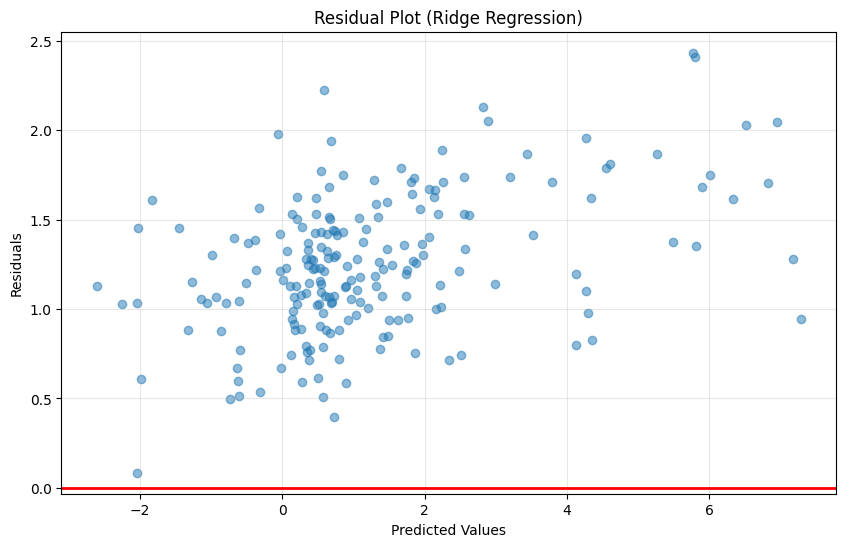

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Ridge Regression)")
plt.grid(True, alpha=0.3)

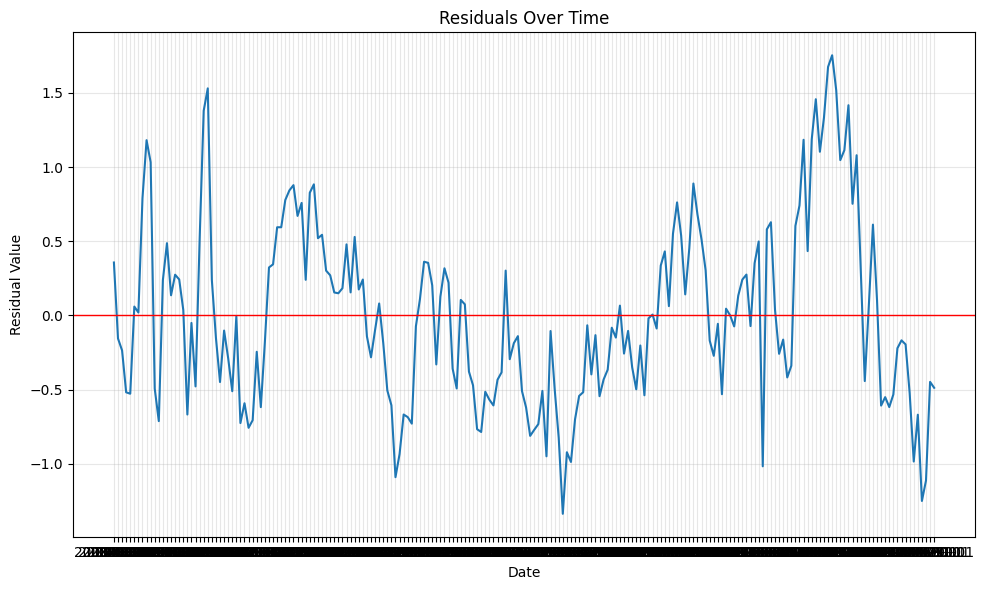

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(post_2008_df_pd['sasdate'], residuals)
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.axhline(y=0, color='r', linestyle='-', linewidth=1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()